In [1]:
import pandas as pd


In [2]:
tumor=pd.read_csv("brain_tumor.csv")

In [3]:
tumor.describe()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.752500,0.782000,0.63050,0.341500,0.139500,0.32250,0.489500,0.723000,0.737000,0.34300,0.700500,0.721500
std,0.431668,0.412991,0.48279,0.474331,0.346554,0.46755,0.500015,0.447628,0.440373,0.47483,0.458154,0.448373
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

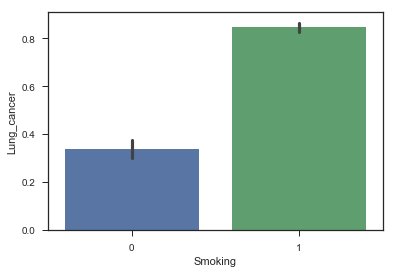

In [5]:
sns.barplot(x="Smoking", y="Lung_cancer", data=tumor);

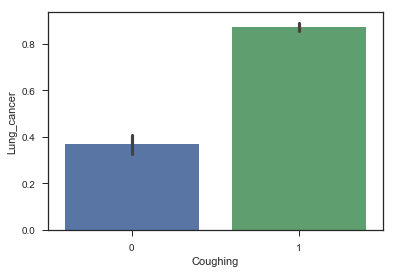

In [6]:
sns.barplot(x="Coughing", y="Lung_cancer", data=tumor);

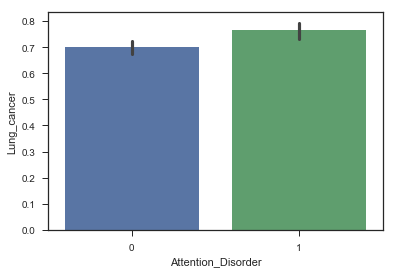

In [7]:
sns.barplot(x="Attention_Disorder", y="Lung_cancer", data=tumor);

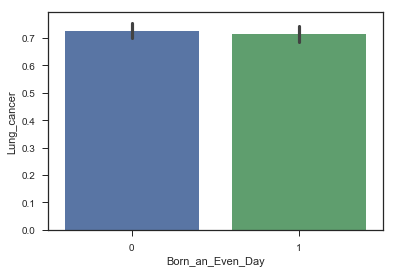

In [8]:
sns.barplot(x="Born_an_Even_Day", y="Lung_cancer", data=tumor);

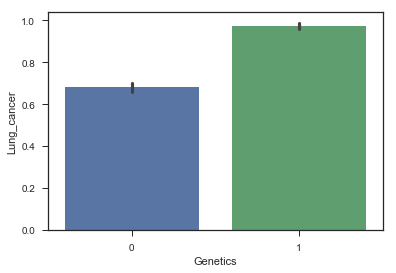

In [9]:
sns.barplot(x="Genetics", y="Lung_cancer", data=tumor);

In [10]:
import numpy as np

In [68]:
X_features=tumor.loc[:,['Smoking','Coughing']]

In [69]:
y_label=tumor['Lung_cancer'].values

In [70]:
y_label

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.3)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [89]:
clf = GradientBoostingClassifier(n_estimators=10000, max_depth=12, random_state=42)

In [90]:
clf = clf.fit(X_train, y_train)

In [91]:
clf.score(X_test, y_test)

0.8033333333333333

In [92]:
print(clf.feature_importances_)

[0.49484822 0.01165178]


In [93]:
predictions = clf.predict(X_test)

In [94]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.90      0.37      0.52       175
          1       0.79      0.98      0.88       425

avg / total       0.82      0.80      0.77       600



In [95]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

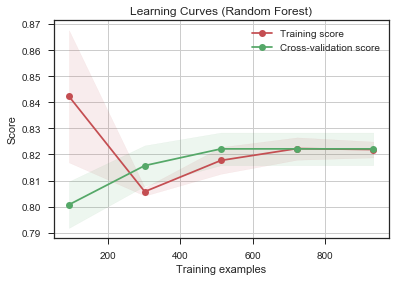

In [96]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()

In [97]:
clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [98]:
confusion_matrix(y_test, predictions1)

array([[  0, 175],
       [  0, 425]], dtype=int64)

In [99]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [100]:
(tn, fp, fn, tp)

(64, 111, 7, 418)

In [101]:
import tensorflow as tf
import sys
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
model.add(Dense(units=2000, activation='relu', input_dim=2))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))



model.add(Dense(units=1, activation='softmax'))

In [102]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=20, batch_size=3200)

Epoch 1/20
1400/1400 [==============================] - 5s 3ms/step - loss: 0.2729 - acc: 0.7271
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2729 - acc: 0.7271
Epoch 3/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 4/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 5/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 6/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 7/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 8/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 9/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 10/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2729 - acc: 0.7271
Epoch 11/20
1400/1400 [======

In [104]:
predictions1 = model.predict(X_test)

In [105]:
confusion_matrix(y_test, predictions1)

array([[  0, 175],
       [  0, 425]], dtype=int64)

In [106]:
print(classification_report(y_test, predictions1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       175
          1       0.71      1.00      0.83       425

avg / total       0.50      0.71      0.59       600



F:\nff\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [108]:
(tn, fp, fn, tp)

(64, 111, 7, 418)